In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

In [3]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)

In [27]:
df_log = np.log(df)
df_diff = df_log.diff(periods = 1)

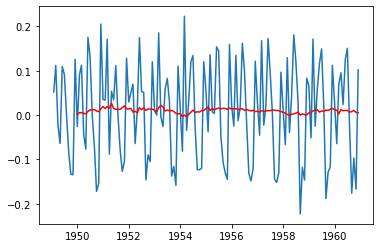

In [28]:
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), c = 'red');

In [29]:
df_diff = df_diff.interpolate(method = 'linear', limit_direction = 'backward')

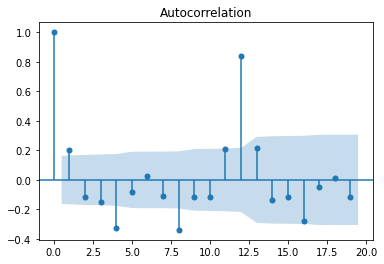

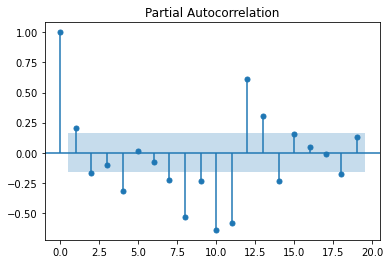

In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_diff, lags = range(0, 20))
plt.show()

plot_pacf(df_diff, lags = range(0, 20))
plt.show()

C:\Users\U\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\U\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

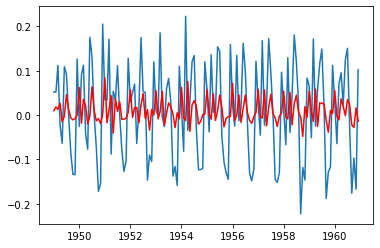

In [31]:
from statsmodels.tsa.arima_model import ARIMA

AR_model = ARIMA(df_diff, order = (2, 0, 0))
AR_model_results = AR_model.fit()

plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, c = 'red');

C:\Users\U\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


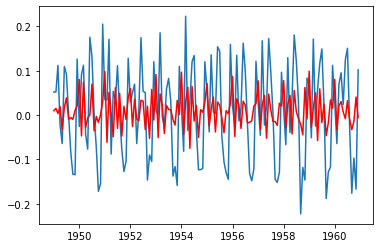

In [33]:
MA_model = ARIMA(df_diff, order = (0, 0, 2))
MA_model_results = MA_model.fit()

plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, c = 'red');

C:\Users\U\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\U\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

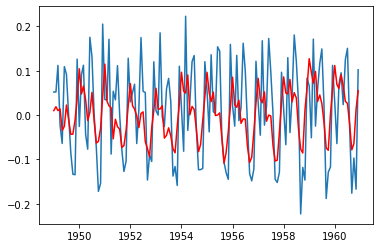

In [34]:
ARIMA_model = ARIMA(df_diff, order = (2, 0, 1))
ARIMA_model_results = ARIMA_model.fit()

plt.plot(df_diff)
plt.plot(ARIMA_model_results.fittedvalues, c= 'red');